In [66]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Le tecniche di pre-processing che son state adottate comprendono:
- Il ridimensionamento dell'immagine, in modo tale che tutte le immagini posseggano le stesse dimensioni
- Ho convertito l'immagine in scala di grigi
- Successivamente ho anche eseguito un miglioramento del contrasto tramite equalizzazione dell'istogramma --> aumentare il contrasto globale di un'immagine.

Il miglioramento del contrasto permette quindi di eseguire una sogliatura piú efficace, questo perché: L'equalizzazione "stira" l'istogramma, distribuendo i livelli di grigio su un range più ampio. Questo significa che le zone scure diventano più scure e le zone chiare più chiare, aumentando la differenza tra le due. Con un contrasto più elevato, i bordi tra le diverse regioni dell'immagine diventano più definiti, facilitando la loro individuazione tramite sogliatura. In alcuni casi, l'equalizzazione può aiutare a ridurre l'effetto del rumore presente nell'immagine, migliorando la qualità della segmentazione.


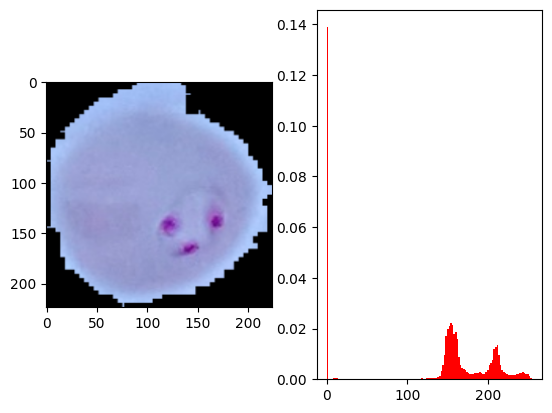

In [67]:
img = cv2.imread('Progetto/malaria/parasite (1).png')
resized = cv2.resize(img, (224, 224))

plt.subplot(1,2,1)
plt.imshow(resized)


plt.subplot(1,2,2) 
plt.hist(resized.ravel(), bins=128, density=True, color='r')

plt.show()

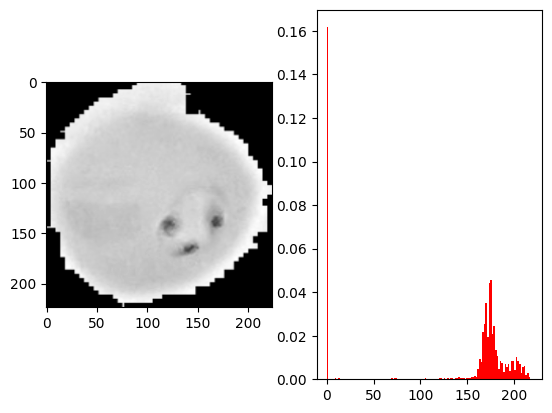

In [68]:
# Grayscale
img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')


plt.subplot(1,2,2) 
plt.hist(img_gray.ravel(), bins=128, density=True, color='r');

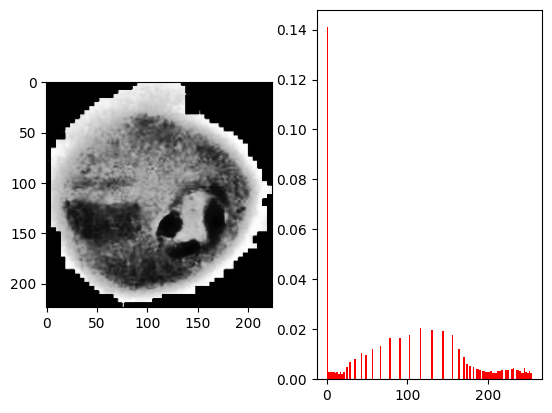

In [69]:
eq_img = cv2.equalizeHist(img_gray)

plt.subplot(1,2,1)
plt.imshow(eq_img, cmap='gray')

plt.subplot(1,2,2)
plt.hist(eq_img.ravel(), bins=128, density=True, color='r');


Cerco di applicare una sogliatura --> devo scegliere un valore adeguato per la soglia, altrimenti potrebbe capitare che se la soglia è troppo bassa, quasi tutti i pixel supereranno questo valore e l'immagine risultante sarà quasi completamente bianca.
Un idea puó essere applicare una prima sogliatura all'immagine ed ottenere una sorta di "maschera" per separare l'immagine dallo sfondo  

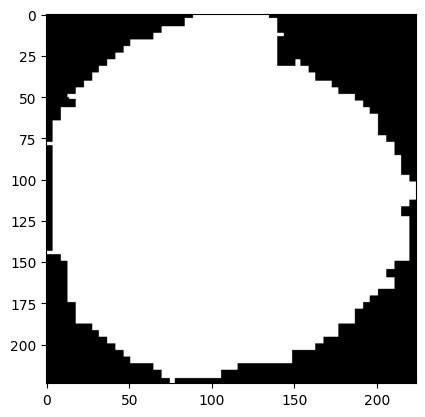

In [70]:
_, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY )
plt.imshow(mask, cmap='gray')

Applico la maschera all'imagine originale --> faccio un AND bit a bit tra le due immagini

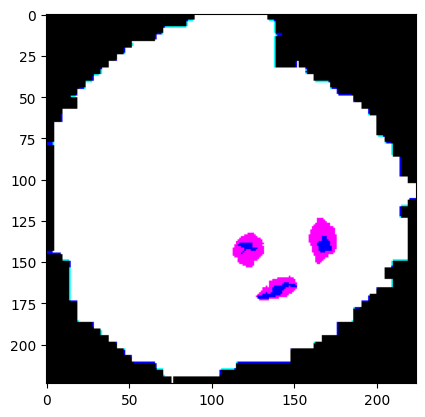

In [71]:
img_senza_sfondo = cv2.bitwise_and(resized, resized, mask=mask)
_, img_binaria_finale = cv2.threshold(img_senza_sfondo, 128, 255, cv2.THRESH_BINARY)

plt.imshow(img_binaria_finale)